**Python version:**  3.x

### Variabili da Inizializzare

In [1]:
# set the path of the directory where your modules are
modulesPath = 'C:\\Users\\loren\\Documents\\Progetti\\Scuola\\AdvDataMining\\__Repo__'

#### Moduli

In [2]:
import os
import sys

if os.path.isdir(modulesPath) and modulesPath not in sys.path:
    sys.path.append(modulesPath)

modulesList = os.listdir(modulesPath)
print('Available Files and Modules for the project:', modulesList,sep='\n')

%matplotlib inline

import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

import df_handle
import data_understanding
import data_preparation
import modeling
import model_evaluation

Available Files and Modules for the project:
['datatest.txt', 'datatest2.txt', 'datatraining.txt', 'data_preparation.py', 'data_understanding.py', 'df_handle.py', 'logisticReg_pred_results.csv', 'modeling.py', 'model_evaluation.py', '__pycache__']


In [3]:
X_train, X_test, y_train, y_test = df_handle.setup_df('datatraining.txt', 'Occupancy', 'datatest.txt')

In [4]:
del X_train['date']
del X_test['date']

# \Decision Tree Classifier\

In [5]:
from sklearn.tree import DecisionTreeClassifier

### Variabili da Inizializzare

In [6]:
#seleziona il modello
model = DecisionTreeClassifier()

# per conoscere tutti i possibili iper-parametri del modello:
model.get_params(deep=False)

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [7]:
#setta il range in cui devono essere cercati gli iper-parametri migliori peril modello

params_domain_dic = {'min_samples_leaf': range(1,150)}


#setta il numero di terazioni che l'algoritmo Random Search deve eseguire per trovare i parametri migliori

iterN = 100

## Ricerca dei migliori Iper-Parametri

In [8]:
clf = modeling.fit_best_clf(X_train, y_train,
                            model=model, iterN=iterN, params_domain_dic=params_domain_dic)

Best values for searched parameters: 
{'min_samples_leaf': 129}


## Validazione del Modello

In [9]:
model_evaluation.validate_clf(clf, X_train, y_train)

Accuracy at a 95 percent confidence interval: 0.98 (+/- 0.05)

F1 Score at a 95 percent confidence interval: 0.97 (+/- 0.06)


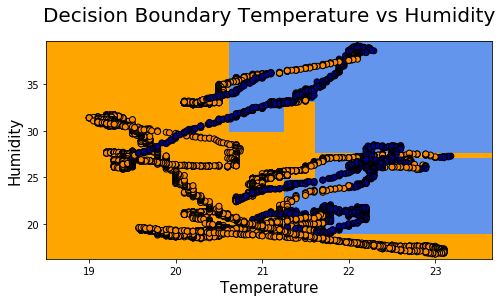

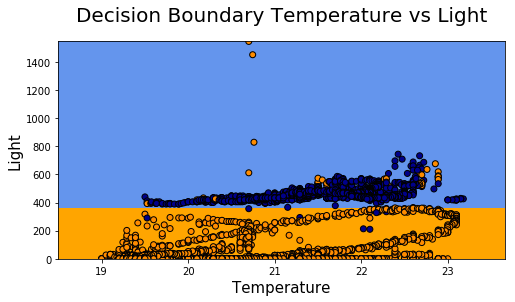

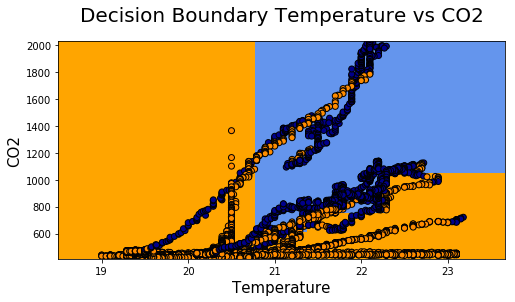

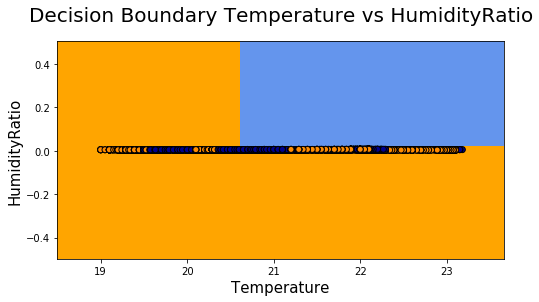

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\loren\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2963, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-10-a3202cf50c85>", line 1, in <module>
    model_evaluation.decision_boundary_scatterplots(X_train, y_train, clf)
  File "C:\Users\loren\Documents\Progetti\Scuola\AdvDataMining\__Repo__\model_evaluation.py", line 59, in decision_boundary_scatterplots
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  File "C:\Users\loren\Anaconda3\lib\site-packages\numpy\lib\function_base.py", line 4698, in meshgrid
    output = [x.copy() for x in output]
  File "C:\Users\loren\Anaconda3\lib\site-packages\numpy\lib\function_base.py", line 4698, in <listcomp>
    output = [x.copy() for x in output]
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\loren\Anaconda3\lib

KeyboardInterrupt: 

In [10]:
model_evaluation.decision_boundary_scatterplots(X_train, y_train, clf)

## Test del modello

Accuracy: 0.9786116322701689

F1-score: [0.98290855 0.97142857]

Weighted Average F1-score: 0.9787214781780913

             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665




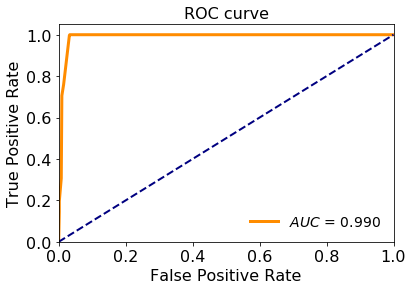

In [10]:
model_evaluation.test_clf(clf, X_test, y_test)

### Importanza degli Attributi

In [11]:
clf.feature_importances_

array([5.55051393e-03, 6.49993465e-03, 9.85944897e-01, 1.97703311e-03,
       2.76217420e-05])

In [12]:
max(clf.feature_importances_)

0.9859448965646704

In [13]:
X_test

,Temperature,Humidity,Light,CO2,HumidityRatio
140,23.700000,26.272000,585.200000,749.200000,0.004764
141,23.718000,26.290000,578.400000,760.400000,0.004773
142,23.730000,26.230000,572.666667,769.666667,0.004765
143,23.722500,26.125000,493.750000,774.750000,0.004744
144,23.754000,26.200000,488.600000,779.000000,0.004767
145,23.760000,26.260000,568.666667,790.000000,0.004779
146,23.730000,26.290000,536.333333,798.000000,0.004776
147,23.754000,26.290000,509.000000,797.000000,0.004783
148,23.754000,26.350000,476.000000,803.200000,0.004794
149,23.736000,26.390000,510.000000,809.000000,0.004796


# \K-NN\

In [14]:
from sklearn.neighbors import KNeighborsClassifier

### Variabili da Inizializzare

In [15]:
#seleziona il modello
model = KNeighborsClassifier()

# per conoscere tutti i possibili iper-parametri del modello:
model.get_params(deep=False)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [16]:
#setta il range in cui devono essere cercati gli iper-parametri migliori peril modello

params_domain_dic = {'n_neighbors': range(1,30),
                    'weights': ['uniform', 'distance']}

#setta il numero di terazioni che l'algoritmo Random Search deve eseguire per trovare i parametri migliori

iterN = 10

## Ricerca dei migliori Iper-Parametri

In [17]:
clf = modeling.fit_best_clf(X_train, y_train,
                            model=model, iterN=iterN, params_domain_dic=params_domain_dic)

Best values for searched parameters: 
{'weights': 'uniform', 'n_neighbors': 26}


## Validazione del Modello

In [18]:
model_evaluation.validate_clf(clf, X_train, y_train)

Accuracy at a 95 percent confidence interval: 0.97 (+/- 0.04)

F1 Score at a 95 percent confidence interval: 0.96 (+/- 0.07)


In [ ]:
model_evaluation.decision_boundary_scatterplots(X_test, y_test, clf)

## Test del modello

Accuracy: 0.9782363977485928

F1-score: [0.98261391 0.97091274]

Weighted Average F1-score: 0.9783461648279386

             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665




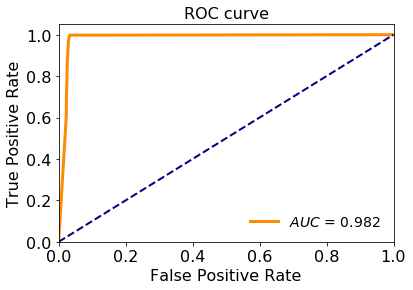

In [19]:
model_evaluation.test_clf(clf, X_test, y_test)

# \Naive Bayes\

In [20]:
from sklearn.naive_bayes import GaussianNB#, CategoricalNB

In [21]:
#seleziona il modello
clf = GaussianNB()

#fitta il modello
clf.fit(X_train, y_train)

GaussianNB(priors=None)

## Validazione del Modello

In [22]:
model_evaluation.validate_clf(clf, X_train, y_train)

Accuracy at a 95 percent confidence interval: 0.96 (+/- 0.05)

F1 Score at a 95 percent confidence interval: 0.95 (+/- 0.07)


In [ ]:
model_evaluation.decision_boundary_scatterplots(X_test, y_test, clf)

## Test del modello

Accuracy: 0.9774859287054409

F1-score: [0.98201439 0.96990973]

Weighted Average F1-score: 0.9775994808564882

             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      0.99      0.97       972

avg / total       0.98      0.98      0.98      2665




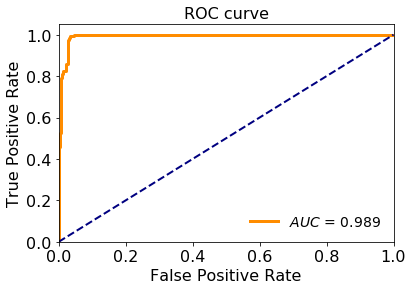

In [23]:
model_evaluation.test_clf(clf, X_test, y_test)

# \Logistic Regression\

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
#seleziona il modello
clf = LogisticRegression(random_state=0)

#fitta il modello
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
print('Coefficients:', clf.coef_, sep='\n', end='\n\n')
print('Intercept:', clf.intercept_, sep='\n')

Coefficients:
[[-5.16482752e-01  4.40977352e-02  1.99510758e-02  4.31632202e-03
  -3.47110769e-05]]

Intercept:
[-0.01569535]


## Validazione del Modello

In [27]:
model_evaluation.validate_clf(clf, X_train, y_train)

Accuracy at a 95 percent confidence interval: 0.99 (+/- 0.03)

F1 Score at a 95 percent confidence interval: 0.98 (+/- 0.04)


In [ ]:
model_evaluation.decision_boundary_scatterplots(X_test, y_test, clf)

## Test del modello

Accuracy: 0.9782363977485928

F1-score: [0.98260348 0.97094188]

Weighted Average F1-score: 0.9783501694123646

             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665




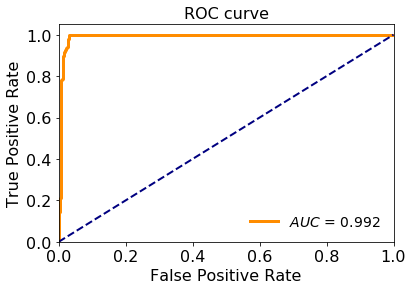

In [28]:
model_evaluation.test_clf(clf, X_test, y_test)

# Export risultati migliori

In [10]:
df_handle.export_results(X_test=X_test, y_test=y_test, clf_or_reg=clf,
                         exoprt_path=modulesPath, outFileName='logisticReg_pred_results')

# -------  Nuovo Dataset:


# solo 'Light' in input

Feature più importante secondo il Decision Tree:  'Light'

Coefficient: [[0.02186489]]

Intercept: [-7.54818231]




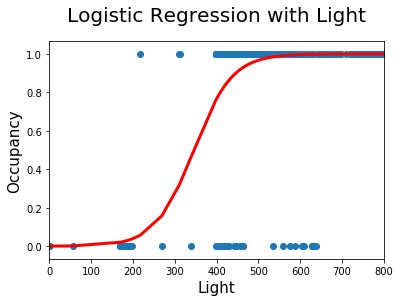



Model Validation on Training Set


Accuracy at a 95 percent confidence interval: 0.97 (+/- 0.05)

F1 Score at a 95 percent confidence interval: 0.96 (+/- 0.07)



Model Test on Test Set


Accuracy: 0.9786116322701689

F1-score: [0.98290855 0.97142857]

Weighted Average F1-score: 0.9787214781780913

             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665




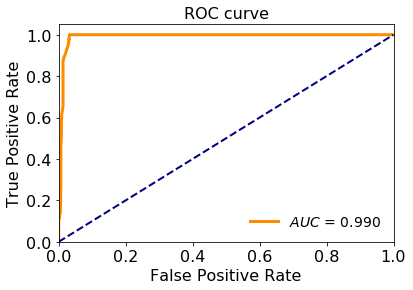

In [29]:
modeling.oneDim_logisticReg(X_train, X_test, y_train, y_test, x='Light', x_max=800, y='Occupancy')

# -------  Nuovo Dataset:

# Regression in 2 dimensions. predire 'Light' tramite 'CO2'

In [30]:
x = 'CO2'
y='Light'

new_X_train = X_train[[x]]
new_X_test = X_test[[x]]

new_y_train = X_train[y]
new_y_test = X_test[y]

correlazione di Pearson Light CO2: 0.664022.
inoltre erano i due attributi con distrbuzioni simili

# \Linear Regression\

Coefficients: 
 [0.41143354]

Intercept: 
 -130.0340915562012


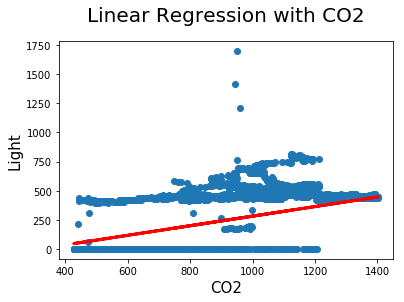

Model Test on Test Set

R2: 0.496
MSE: 31522.323
MAE: 138.033


In [31]:
modeling.oneDim_linearReg(X_train, X_test, y_train=new_y_train, y_test=new_y_test, x='CO2', y='Light')

# \Lasso\

In [32]:
from sklearn.linear_model import Lasso

In [33]:
reg = Lasso()

reg.fit(new_X_train, new_y_train)


print('Coefficients: \n', reg.coef_, end='\n\n')
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.41142341]

Intercept: 
 -130.02795152187446


## Test del modello

In [34]:
model_evaluation.test_reg(reg, new_X_test, new_y_test)

R2: 0.496
MSE: 31522.813
MAE: 138.035


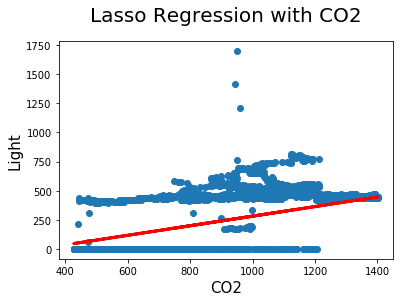

In [35]:
y_pred = reg.predict(new_X_test)

plt.scatter(new_X_test, new_y_test)
plt.plot(new_X_test, y_pred, color='red', linewidth=3)
plt.xlabel(x, fontsize=15)
plt.ylabel(y, fontsize=15)
plt.title('Lasso Regression with ' + x, fontsize=20, pad=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

# \Ridge\

In [36]:
from sklearn.linear_model import Ridge

In [37]:
reg = Ridge()

reg.fit(new_X_train, new_y_train)


print('Coefficients: \n', reg.coef_, end='\n\n')
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [0.41143354]

Intercept: 
 -130.03409124596965


## Test del modello

In [38]:
model_evaluation.test_reg(reg, new_X_test, new_y_test)

R2: 0.496
MSE: 31522.323
MAE: 138.033


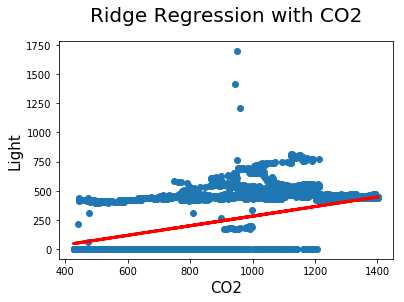

In [39]:
y_pred = reg.predict(new_X_test)

plt.scatter(new_X_test, new_y_test)
plt.plot(new_X_test, y_pred, color='red', linewidth=3)
plt.xlabel(x, fontsize=15)
plt.ylabel(y, fontsize=15)
plt.title('Ridge Regression with ' + x, fontsize=20, pad=20)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.show()

# ------- Nuovo dataset:

# Predire 'Light' tramite tutti gli altri attributi

Feature più importante secondo il Decision Tree:  'Light'

In [40]:
selected_columns = X_train.columns.difference(['Light'])

new_X_train = X_train[selected_columns]
new_X_test = X_test[selected_columns]

new_y_train = X_train['Light']
new_y_test = X_test['Light']

# \Linear Regression\

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
#seleziona il modello
reg = LinearRegression()

#fitta il modello
reg.fit(new_X_train, new_y_train)

print('Coefficients: \n', reg.coef_, end='\n\n')
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 5.73942904e-01  1.99727669e+02 -1.38230452e+06  3.54978233e+02]

Intercept: 
 -7348.062921895676


## Test del modello

In [43]:
model_evaluation.test_reg(reg, new_X_test, new_y_test)

R2: 0.543
MSE: 28603.062
MAE: 136.903


# \Lasso\

In [44]:
from sklearn.linear_model import Lasso

In [45]:
reg = Lasso()

reg.fit(new_X_train, new_y_train)


print('Coefficients: \n', reg.coef_, end='\n\n')
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 0.35181318 -5.89903946 -0.         58.07430808]

Intercept: 
 -1139.519428475392


## Test del modello

In [46]:
model_evaluation.test_reg(reg, new_X_test, new_y_test)

R2: 0.594
MSE: 25415.886
MAE: 131.483


# \Ridge\

In [47]:
from sklearn.linear_model import Ridge

In [48]:
reg = Ridge()

reg.fit(new_X_train, new_y_train)


print('Coefficients: \n', reg.coef_, end='\n\n')
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [  0.3477621   -5.78251719 -15.82717156  59.82726223]

Intercept: 
 -1176.143727608895


## Test del modello

In [49]:
model_evaluation.test_reg(reg, new_X_test, new_y_test)

R2: 0.595
MSE: 25364.214
MAE: 131.360


# PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)

In [ ]:
X_train_pca.shape

In [ ]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='k', alpha=0.7)
plt.show()

In [ ]:
X_test_pca = pca.transform(X_test)

clf = DecisionTreeClassifier(min_samples_leaf=3, random_state=42)
clf.fit(X_train_pca, y_train)

y_pred = clf.predict(X_test_pca)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

In [ ]:
plt.plot(PCA(n_components=4).fit(iris.data).explained_variance_ratio_, lw=3, color='r', ms=2)
plt.title("PCA")
plt.ylabel("Fraction of Variance")
plt.xticks(range(4), iris.feature_names)
plt.show()